In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
print(df.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [5]:
print(df.describe())

       Passengerid          Age         Fare          Sex        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    29.503186    33.281086     0.355997     0.498854   
std     378.020061    12.905241    51.741500     0.478997     1.041658   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%     328.000000    22.000000     7.895800     0.000000     0.000000   
50%     655.000000    28.000000    14.454200     0.000000     0.000000   
75%     982.000000    35.000000    31.275000     1.000000     1.000000   
max    1309.000000    80.000000   512.329200     1.000000     8.000000   

         zero  zero.1  zero.2  zero.3  zero.4  ...  zero.12  zero.13  zero.14  \
count  1309.0  1309.0  1309.0  1309.0  1309.0  ...   1309.0   1309.0   1309.0   
mean      0.0     0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
std       0.0     0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
min      

In [6]:
df = df.iloc[:, list(range(1, 5)) + [12, 21, 24, -1]]
df = df.rename(columns={"2urvived": "Survived"})

In [7]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
Survived    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64

<Axes: >

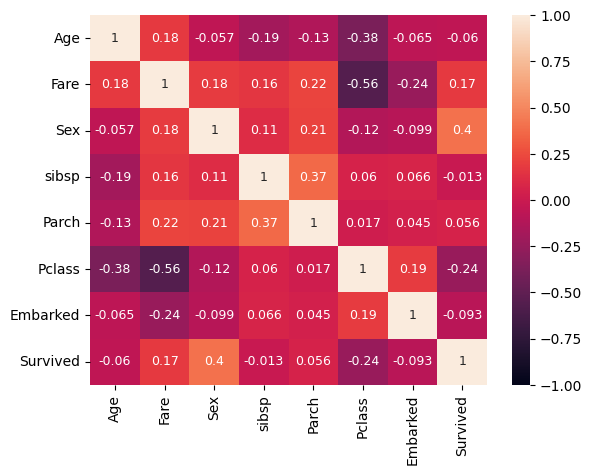

In [10]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, annot_kws=dict(fontsize=9))

In [11]:
print(df.head())

    Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived
0  22.0   7.2500    0      1      0       3       2.0         0
1  38.0  71.2833    1      1      0       1       0.0         1
2  26.0   7.9250    1      0      0       3       2.0         1
3  35.0  53.1000    1      1      0       1       2.0         1
4  35.0   8.0500    0      0      0       3       2.0         0


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1307 non-null   float64
 1   Fare      1307 non-null   float64
 2   Sex       1307 non-null   int64  
 3   sibsp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Pclass    1307 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   Survived  1307 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.9 KB
None


In [13]:
X = df.iloc[:, [1, 2, 5, 6]].values.reshape(-1, 4)
y = df.iloc[:, -1].values.reshape(-1, 1)

In [14]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [18]:
# Gradient Descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradient = (1/m) * X.T.dot(sigmoid(X.dot(theta)) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Optionally, you can print the cost to monitor convergence
        # if i % 100 == 0:
        #     print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

In [19]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

# Initialize parameters
theta = np.zeros((X_b.shape[1], 1))
alpha = 0.0001  # Learning rate
num_iterations = 100000

In [20]:
# Perform Gradient Descent
theta, cost_history = gradient_descent(X_b, y_train, theta, alpha, num_iterations)

print("\nOptimized Theta:", theta)
print("Final Cost:", cost_history[-1])


Optimized Theta: [[-0.9734719 ]
 [ 0.07392734]
 [ 0.69258399]
 [-0.32246556]
 [-0.0356533 ]]
Final Cost: 0.4827112298708406


In [21]:
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = X_test_b.dot(theta)

threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # metric đánh giá

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # TP/(TP + FP) --> độ chính xác trên class đấy cao
recall = recall_score(y_test, y_pred) # TP/(TP + FN) --> không bị lẫn sang class
f1 = f1_score(y_test, y_pred) # f1 = 2 * p * r/(p + r) --> chỉ số trung hòa

print('accuracy decisionTree: %.3f' %accuracy)
print('precision decisionTree: %.3f' %precision)
print('recall decisionTree: %.3f' %recall)
print('f1-score decisionTree : %.3f' %f1)

accuracy decisionTree: 0.767
precision decisionTree: 0.643
recall decisionTree: 0.261
f1-score decisionTree : 0.371


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

y_train = y_train.ravel()
y_test = y_test.ravel()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # TP/(TP + FP) --> độ chính xác trên class đấy cao
recall = recall_score(y_test, y_pred) # TP/(TP + FN) --> không bị lẫn sang class
f1 = f1_score(y_test, y_pred) # f1 = 2 * p * r/(p + r) --> chỉ số trung hòa

print('accuracy decisionTree: %.3f' %accuracy)
print('precision decisionTree: %.3f' %precision)
print('recall decisionTree: %.3f' %recall)
print('f1-score decisionTree : %.3f' %f1)

accuracy decisionTree: 0.794
precision decisionTree: 0.627
recall decisionTree: 0.536
f1-score decisionTree : 0.578
